<a href="https://colab.research.google.com/github/rodrygofesantos/oficina_forped/blob/main/grafico_barra_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gráfico de barras simples**

Gráficos de barras são particularmente úteis para representar quantitativamente a distribuição de elementos entre categorias informacionais distintas.
Esse tipo de visualização permite responder a questões centrais da análise informacional, como:

* “Quais títulos concentram maior visibilidade ou relevância segundo critérios externos (institucionais, mediáticos, curatoriais)?”
* “Quantos objetos estão associados a cada categoria de análise?”




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('/content/Oscar_2025.xlsx')

In [6]:
df.head(5)

,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner
0,2024,2025,97,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Adrien Brody,The Brutalist,VERDADEIRO
1,2024,2025,97,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Timothée Chalamet,A Complete Unknown,FALSO
2,2024,2025,97,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Colman Domingo,Sing Sing,FALSO
3,2024,2025,97,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Ralph Fiennes,Conclave,FALSO
4,2024,2025,97,ACTOR IN A LEADING ROLE,ACTOR IN A LEADING ROLE,Sebastian Stan,The Apprentice,FALSO


Esse comando conta quantas vezes cada filme aparece na planilha, ou seja, quantas indicações ao Oscar cada um recebeu. Depois, ele monta uma nova tabela com o nome do filme e o total de vezes que ele foi indicado.

In [7]:
df_ordenado = df.sort_values('category', ascending=True)

In [8]:
df_nomeacoes = df.groupby('film').size().reset_index(name='indicacoes')

In [22]:
df_ordenado = df_nomeacoes.sort_values('indicacoes', ascending=False)

* fig é a figura completa (como uma folha em branco).
* ax é o espaço dentro da figura onde o gráfico será desenhado.
* figsize=(12, 6) define o tamanho da imagem: 12 de largura e 6 de altura (em polegadas).

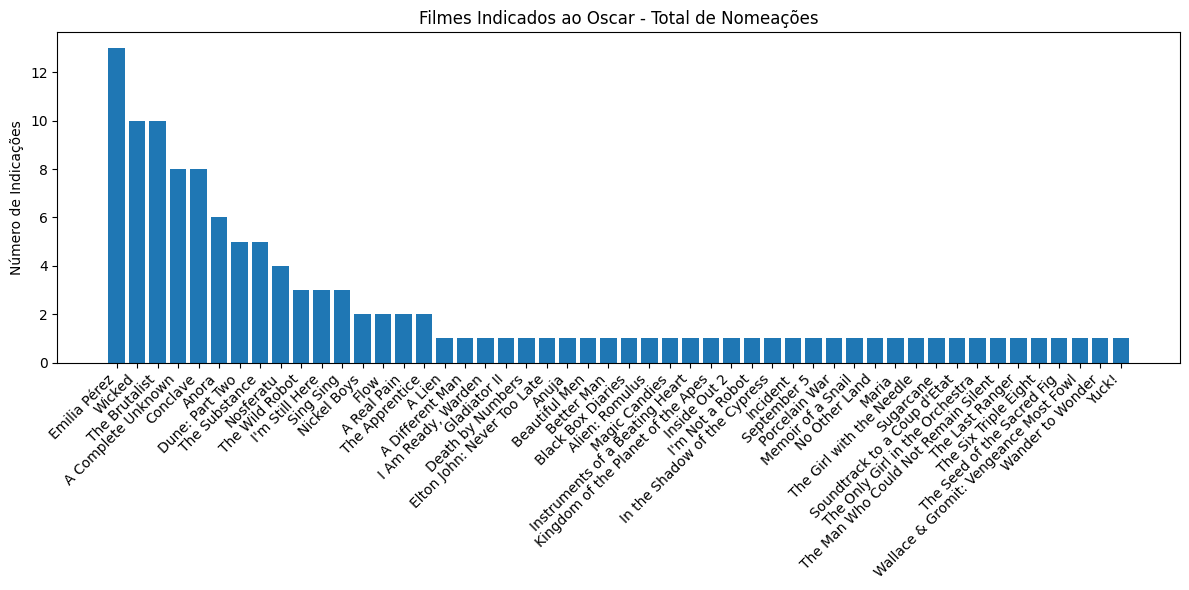

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
ax.bar(df_ordenado['film'], df_ordenado['indicacoes'])
ax.set_ylabel("Número de Indicações")
ax.set_title("Filmes Indicados ao Oscar - Total de Nomeações")
plt.tight_layout()
plt.show()

* Cria um gráfico de barras verticais.
* Eixo X: nomes dos filmes.
* Eixo Y: número de indicações que cada filme recebeu.

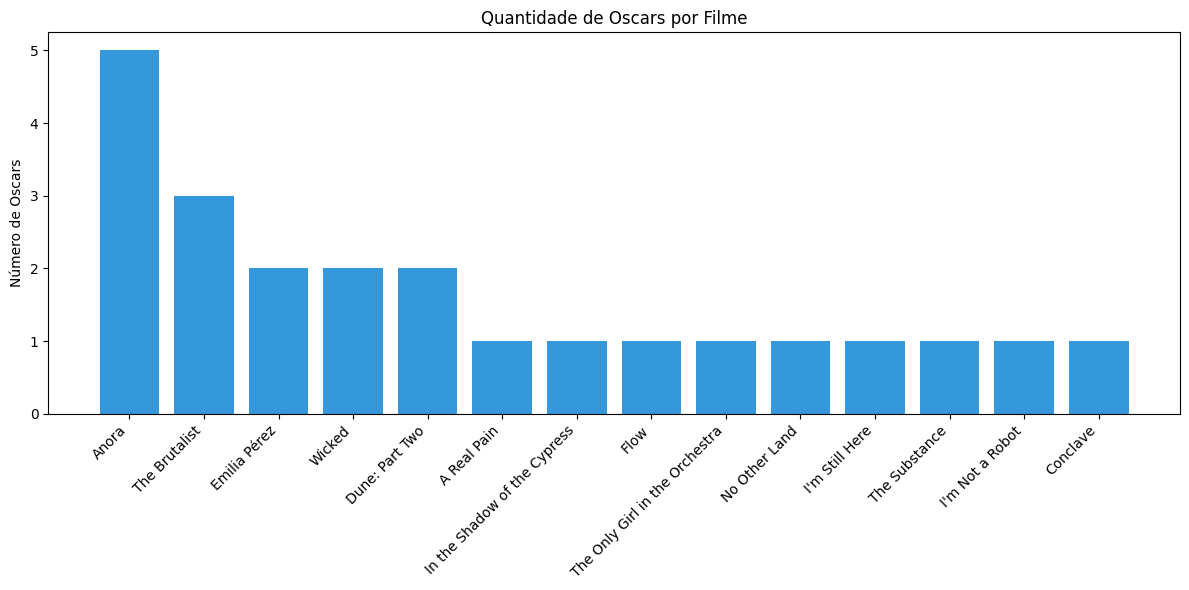

In [15]:
# Filtrando os filmes vencedores
df_ganhadores = df[df['winner'] == 'VERDADEIRO']  # ou df['winner'] == True se for booleano

# Contando quantos prêmios cada filme ganhou (com repetições)
contagem_oscars = df_ganhadores['film'].value_counts().reset_index()
contagem_oscars.columns = ['filme', 'oscars']

# Ordenando do maior para o menor número de Oscars
contagem_oscars = contagem_oscars.sort_values(by='oscars', ascending=False)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(contagem_oscars['filme'], contagem_oscars['oscars'], color='#3498DB')

# Melhorando a visualização
plt.xticks(rotation=45, ha='right')
ax.set_ylabel("Número de Oscars")
ax.set_title("Quantidade de Oscars por Filme")
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Vamos colocar cores e rotulos de valores

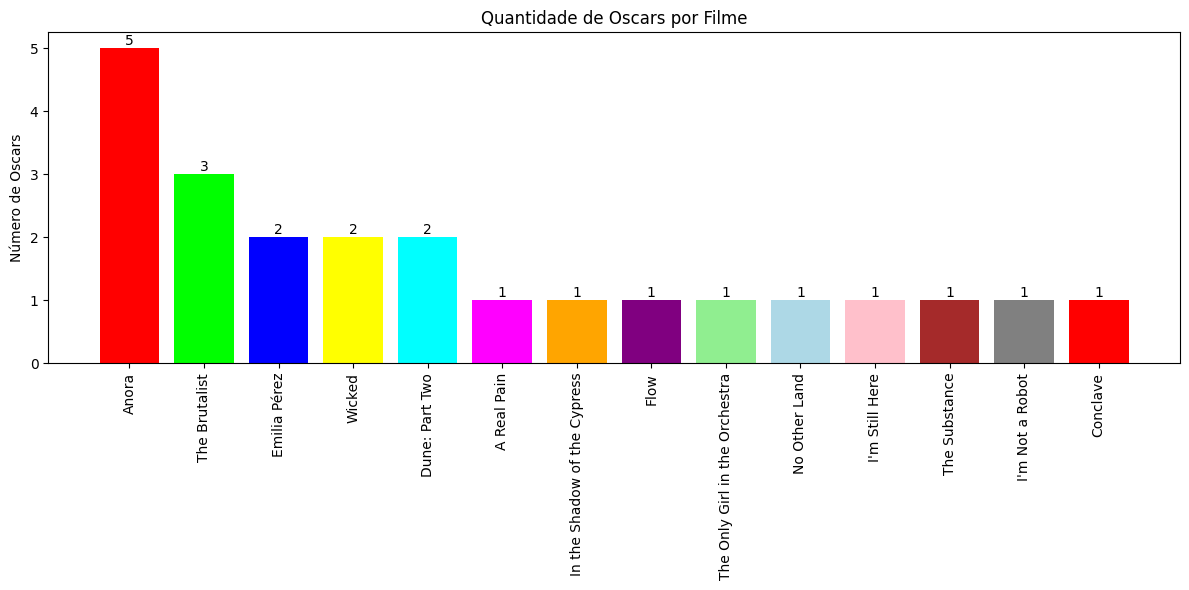

In [ ]:
# Cores para cada barra (ajuste conforme o número de filmes)
bar_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF',
              '#FFA500', '#800080', '#90EE90', '#ADD8E6', '#FFC0CB', '#A52A2A', '#808080']

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Criação das barras e captura do contêiner
bar_container = ax.bar(contagem_oscars['filme'], contagem_oscars['oscars'], color=bar_colors[:len(contagem_oscars)])

# Adicionando etiquetas no topo de cada barra
ax.bar_label(bar_container)

# Personalizações
ax.set_ylabel("Número de Oscars")
ax.set_title("Quantidade de Oscars por Filme")
plt.xticks(rotation=90)
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Mudando a orientação das barras.

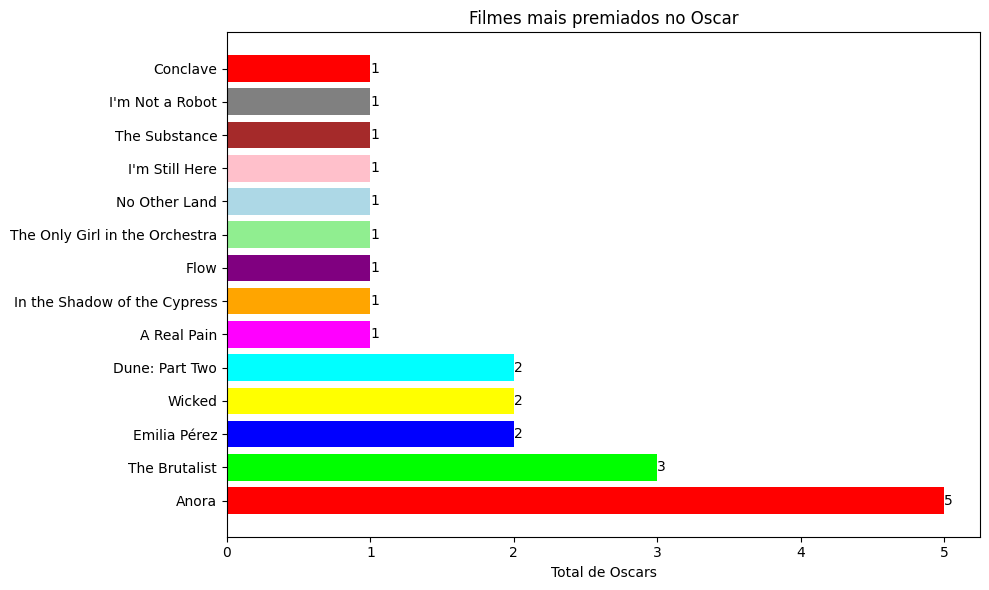

In [ ]:
filmes = contagem_oscars['filme']
total_indicacao = contagem_oscars['oscars']

# Cores para as barras (adaptável à quantidade de filmes)
bar_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF',
              '#FFA500', '#800080', '#90EE90', '#ADD8E6', '#FFC0CB', '#A52A2A', '#808080']

# Cria gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.barh(filmes, total_indicacao, color=bar_colors[:len(filmes)])  # Ajusta o número de cores

# Adiciona etiquetas de valor
ax.bar_label(bar_container)

# Ajustes de rótulos e título
ax.set_xlabel('Total de Oscars')
ax.set_title('Filmes mais premiados no Oscar')

plt.tight_layout()
plt.show()